In [1]:
import numpy as np
from matplotlib import pyplot

%matplotlib inline

In [2]:
def predict(weeks, get_weights):
    probs = np.zeros(8)
    
    weights = get_weights(len(weeks))
    cur_pos = 0
    for week in weeks[::-1]:
        probs += weights[cur_pos] * week
        cur_pos += 1
        
    first_day_probs = []
    cur_prob = 1
    for prob in probs:
        first_day_probs.append(cur_prob * prob)
        cur_prob *= (1 - prob)
    first_day_probs = np.array(first_day_probs)
    
    return first_day_probs.argmax()

In [3]:
def print_results(result, outfile='answer.csv'):
    with open(outfile, 'w') as fout:
        fout.write('id,nextvisit\n' + '\n'.join(', '.join(x) for x in result))

In [4]:
def read_data():
    data = []
    
    with open('train.csv') as fin:
        for line in fin.readlines():
            user_id, days = line.strip().split(',')
            days = set(map(int, days.split()))
            weeks = []

            for week in range(1, 158):
                cur_week = np.zeros(8)
                for day in range(1, 8):
                    abs_day = (week - 1) * 7 + day

                    if abs_day in days:
                        cur_week[day] = 1
                        got_day = True
                if cur_week.sum():
                    weeks.append(cur_week)

            data.append((user_id, weeks))
    
    return data

In [5]:
def get_results(data, get_weights):
    return [(user_id, str(predict(weeks, get_weights))) for user_id, weeks in data]

In [6]:
def accuracy(target, test):
    result = 0
    all_num = 0
    for x, y in zip(target, test):
        all_num += 1
        result += (x == y)
    return result / all_num

In [7]:
def test(data, get_weights):
    test_data = ((id, visits[:-1]) for id, visits in data)
    target = ((id, str(visits[-1].argmax())) for id, visits in data)
    
    result = get_results(test_data, get_weights)
    return accuracy(target, result)

In [19]:
def uniform_weight(week_num):
    return np.ones(week_num) / week_num

def linear_weight(week_num):
    weights = np.ones(week_num) / np.arange(1, week_num + 1)
    return weights / weights.sum()

def square_weight(week_num):
    weights = np.ones(week_num) / np.arange(1, week_num + 1) ** 2
    return weights / weights.sum()

def last_week_weight(week_num):
    weights = np.zeros(week_num)
    weights[0] = 1
    return weights

def exp_weight(week_num, gamma=1):
    weights = np.array([gamma ** i for i in range(1, week_num + 1)])
    return weights / weights.sum()

In [10]:
data = read_data()

<Container object of 7 artists>

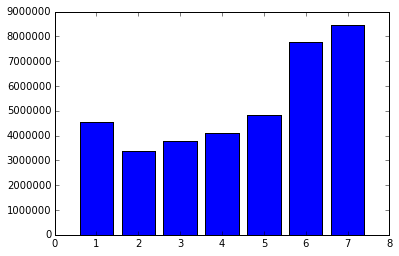

In [11]:
# когда приходят люди
days = sum(x for elem in data for x in elem[1])
pyplot.bar(1 + np.arange(7), days[1:], align='center')

<Container object of 7 artists>

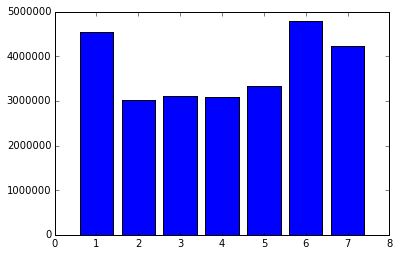

In [12]:
# когда приходят люди первый раз на неделе
days = np.zeros(8)
for elem in data:
    for x in elem[1]:
        days[x.argmax()] += 1
pyplot.bar(1 + np.arange(7), days[1:], align='center')

In [24]:
weight_functions = [uniform_weight,
                    linear_weight,
                    square_weight,
                    last_week_weight]

In [25]:
for weight_function in weight_functions:
    print(test(data, weight_function), weight_function.__name__)

0.23096 uniform_weight
0.21265666666666666 linear_weight
0.18344333333333335 square_weight
0.18339666666666668 last_week_weight


In [30]:
# выбираем gamma
scores = []
for gamma in np.linspace(0.1, 1, 10):
    scores.append(test(data, lambda x: exp_weight(x, gamma)))

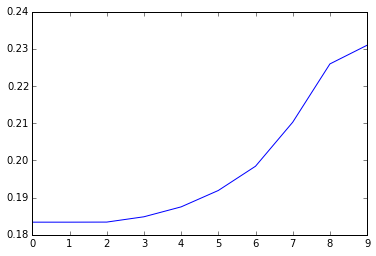

In [31]:
pyplot.plot(np.array(scores))

In [32]:
result = get_results(data, uniform_weight)

In [12]:
print_results(result, 'uniform.csv')